**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [2]:
df = pd.read_csv('/content/chronic kidney disease.csv' )

In [3]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [4]:
df.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

**Columns description**


---



Bp - Blood Pressure

Sg - Specific Gravity

Al - Albumin

Su - Sugar

Rbc - Red Blood Cell

Bu - Blood Urea

Sc - Serum Creatinine

Sod - Sodium

Pot - Pottasium

Hemo - Hemoglobin

Wbcc - White Blood Cell Count

Rbcc - Red Blood Cell Count

Htn - Hypertension

Class - Predicted Class

In [5]:
df.shape

(400, 14)

In [6]:
df.isna().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None


In [8]:
df.nunique()

Bp        11
Sg         5
Al         6
Su         6
Rbc        2
Bu       118
Sc        85
Sod       35
Pot       41
Hemo     116
Wbcc      90
Rbcc      46
Htn        3
Class      2
dtype: int64

In [9]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


This above code is using the .describe() method from the pandas library on a DataFrame df. The .describe() method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values. By default, it provides the count, mean, standard deviation (std), minimum (min), lower percentile (25%), median (50%), upper percentile (75%), and maximum (max) for numerical columns.

In [10]:
df.value_counts('Class')

Class
1    250
0    150
dtype: int64

In [11]:
df.drop_duplicates()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


**Data Vizualization**

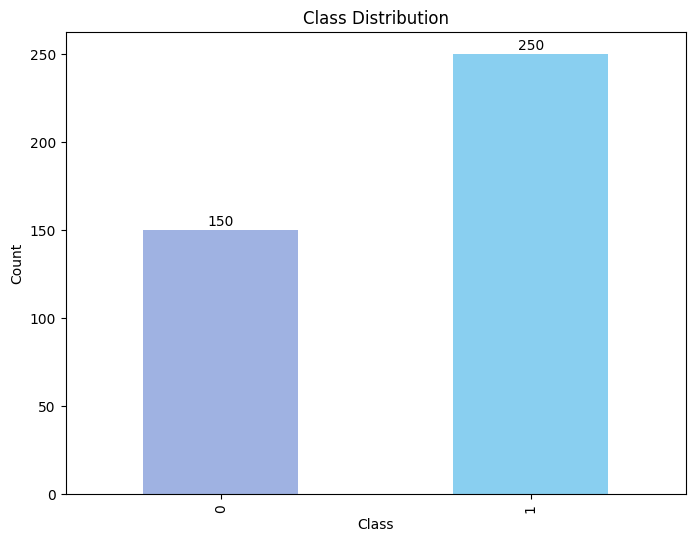

In [12]:
class_counts = df['Class'].value_counts().sort_index()
colors = ['#9fb2e2', '#89cff0']
ax = class_counts.plot(kind='bar', color=colors, figsize=(8, 6))
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(class_counts)), class_counts.index)
plt.show()

Explanation of the Code:

class_counts = df['Class'].value_counts().sort_index()

This line calculates the frequency of each unique value in the 'Class' column of the DataFrame df. The .value_counts() method counts the occurrence of each unique value, and .sort_index() sorts these counts based on the class value (assumed to be 0 and 1 here).
colors = ['green', 'red']

Here, a list of colors is defined to be used in the bar chart. 'green' will be used for the first bar (class 0), and 'red' for the second bar (class 1).
ax = class_counts.plot(kind='bar', color=colors, figsize=(8, 6))

This line creates a bar chart with the counts of each class. The kind='bar' argument specifies a bar chart, color=colors assigns the colors to each bar, and figsize=(8, 6) sets the size of the figure.
for i, count in enumerate(class_counts):

This loop iterates over the class_counts Series. enumerate provides both the index (i) and the value (count) for each item in the series.
plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

Inside the loop, this line adds the count as text above each bar. plt.text places text on the figure at the given coordinates: i is the x-position (bar index), count + 0.5 is the y-position just above the bar, str(count) is the text to be displayed, and ha='center', va='bottom' centers the text horizontally and positions it vertically just above the bar.
plt.title('Class Distribution')

Sets the title of the plot to 'Class Distribution'.
plt.xlabel('Class')

Labels the x-axis as 'Class'.
plt.ylabel('Count')

Labels the y-axis as 'Count'.
plt.xticks(range(len(class_counts)), class_counts.index)

Sets the x-tick labels. range(len(class_counts)) generates a sequence of indices for the bars, and class_counts.index provides the corresponding class labels for these indices.
plt.show()

Displays the plot. If this line is omitted, the plot may not appear in some environments, or it may generate a plot object without actually rendering the image.

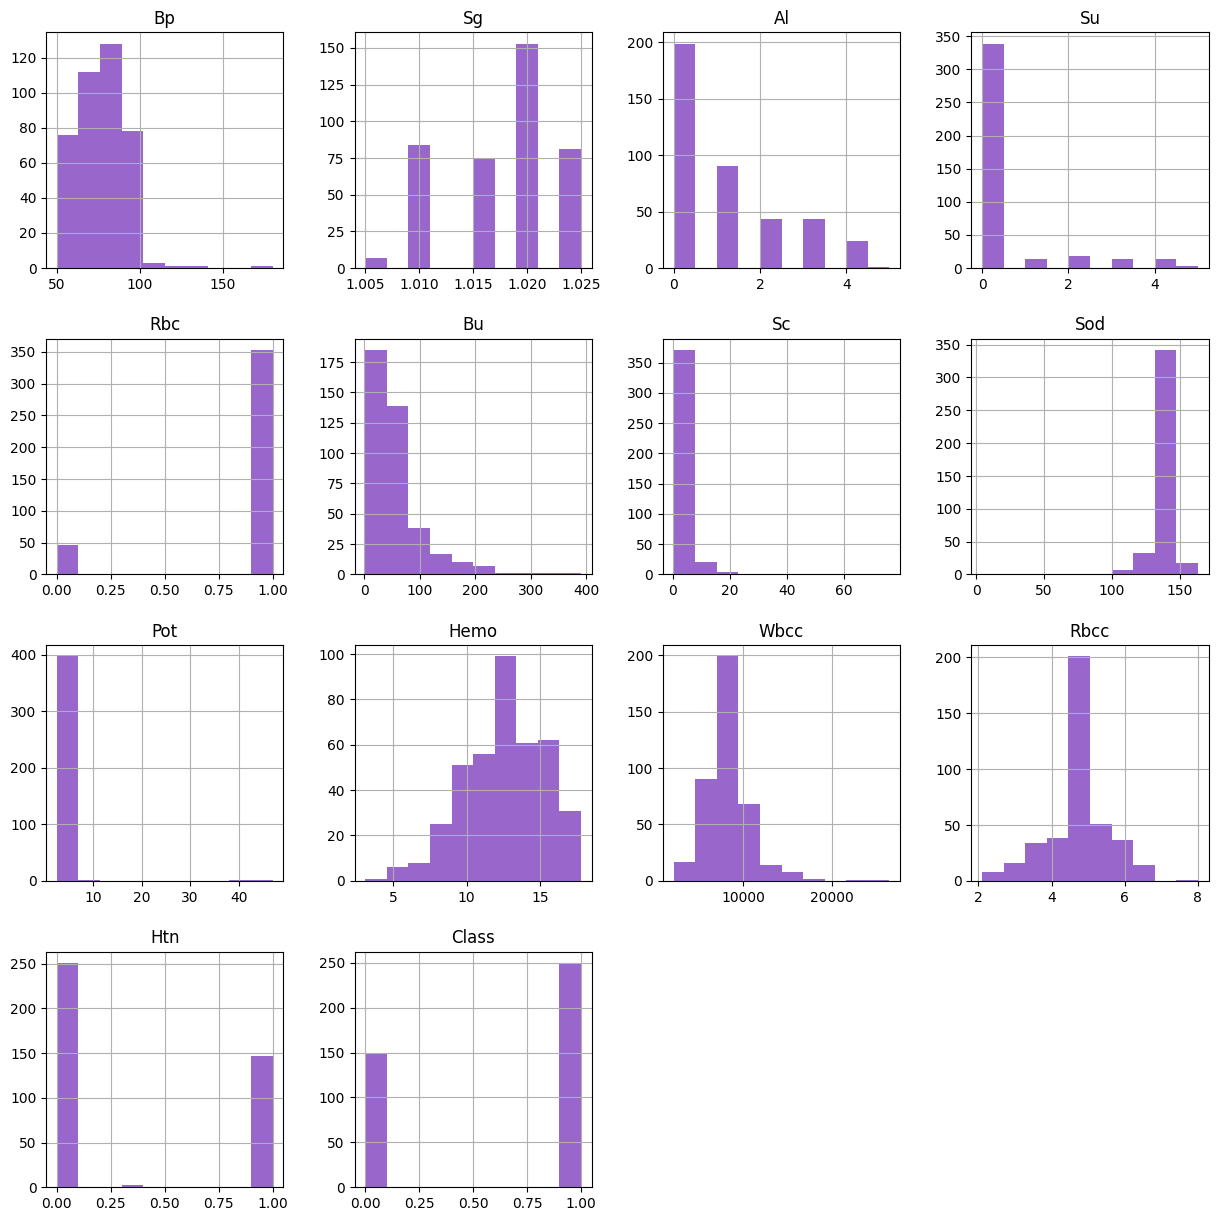

In [13]:
plot = df.hist(figsize=(15,15), color = '#9966cc')


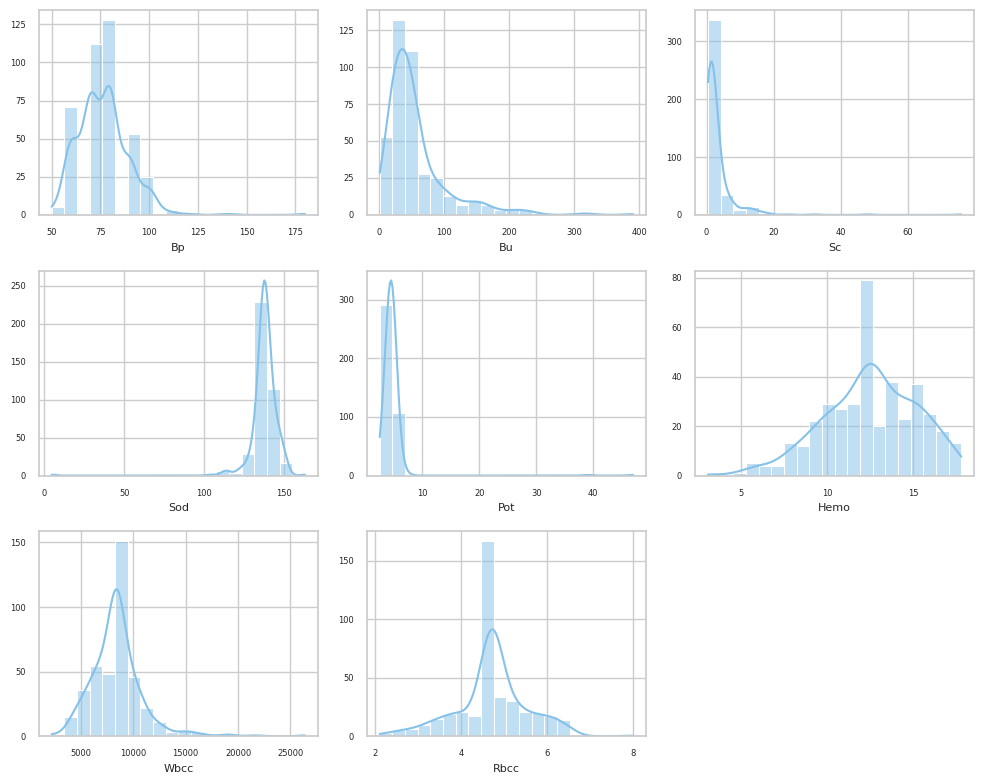

In [14]:
numerical_columns = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']

sns.set(style='whitegrid')
plt.figure(figsize=(10,8))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=var, kde=True, bins=20, color='#85C1E9')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel(var, fontsize=8)
    plt.ylabel('')
plt.tight_layout()
plt.show()

Breakdown of the code:

numerical_columns = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']

This line defines a list of column names that are considered numerical and for which histograms will be plotted.
sns.set(style='whitegrid')

Sets the aesthetic style of the plots to have a white background with gridlines using the seaborn library.
plt.figure(figsize=(10,6))

Initializes a new figure for plotting with a width of 10 inches and a height of 6 inches.
for i, var in enumerate(numerical_columns, 1):

This starts a loop over the numerical_columns list, with enumerate providing both the index i (starting from 1) and the column name var.
plt.subplot(3, 3, i)

Within the loop, this line creates a subplot on a 3x3 grid (9 subplots in total) for each histogram. The index i determines the position of the subplot on the grid.
sns.histplot(data=df, x=var, kde=True, bins=20, color='Teal')

Uses seaborn's histplot to create a histogram for the column var. kde=True adds a kernel density estimate line to show the distribution shape, bins=20 specifies that the data range should be divided into 20 bins, and color='Teal' sets the color of the histogram bars to teal.
plt.xticks(fontsize=6)

Sets the font size of the x-axis tick labels to 6, making them smaller for readability.
plt.yticks(fontsize=6)

Sets the font size of the y-axis tick labels to 6, consistent with the x-axis for uniformity.
plt.xlabel(var, fontsize=8)

Labels the x-axis with the name of the variable being plotted and sets the font size to 8.
plt.ylabel('')

Sets the y-axis label to an empty string, effectively removing it.
plt.tight_layout()

Adjusts the subplots to fit into the figure area without overlapping.
plt.show()

Displays the figure with all the subplots.

**Visualization of all the Features against the Outcome(target) **

<ipython-input-15-0d3586db92a6>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column,value in df.iteritems():


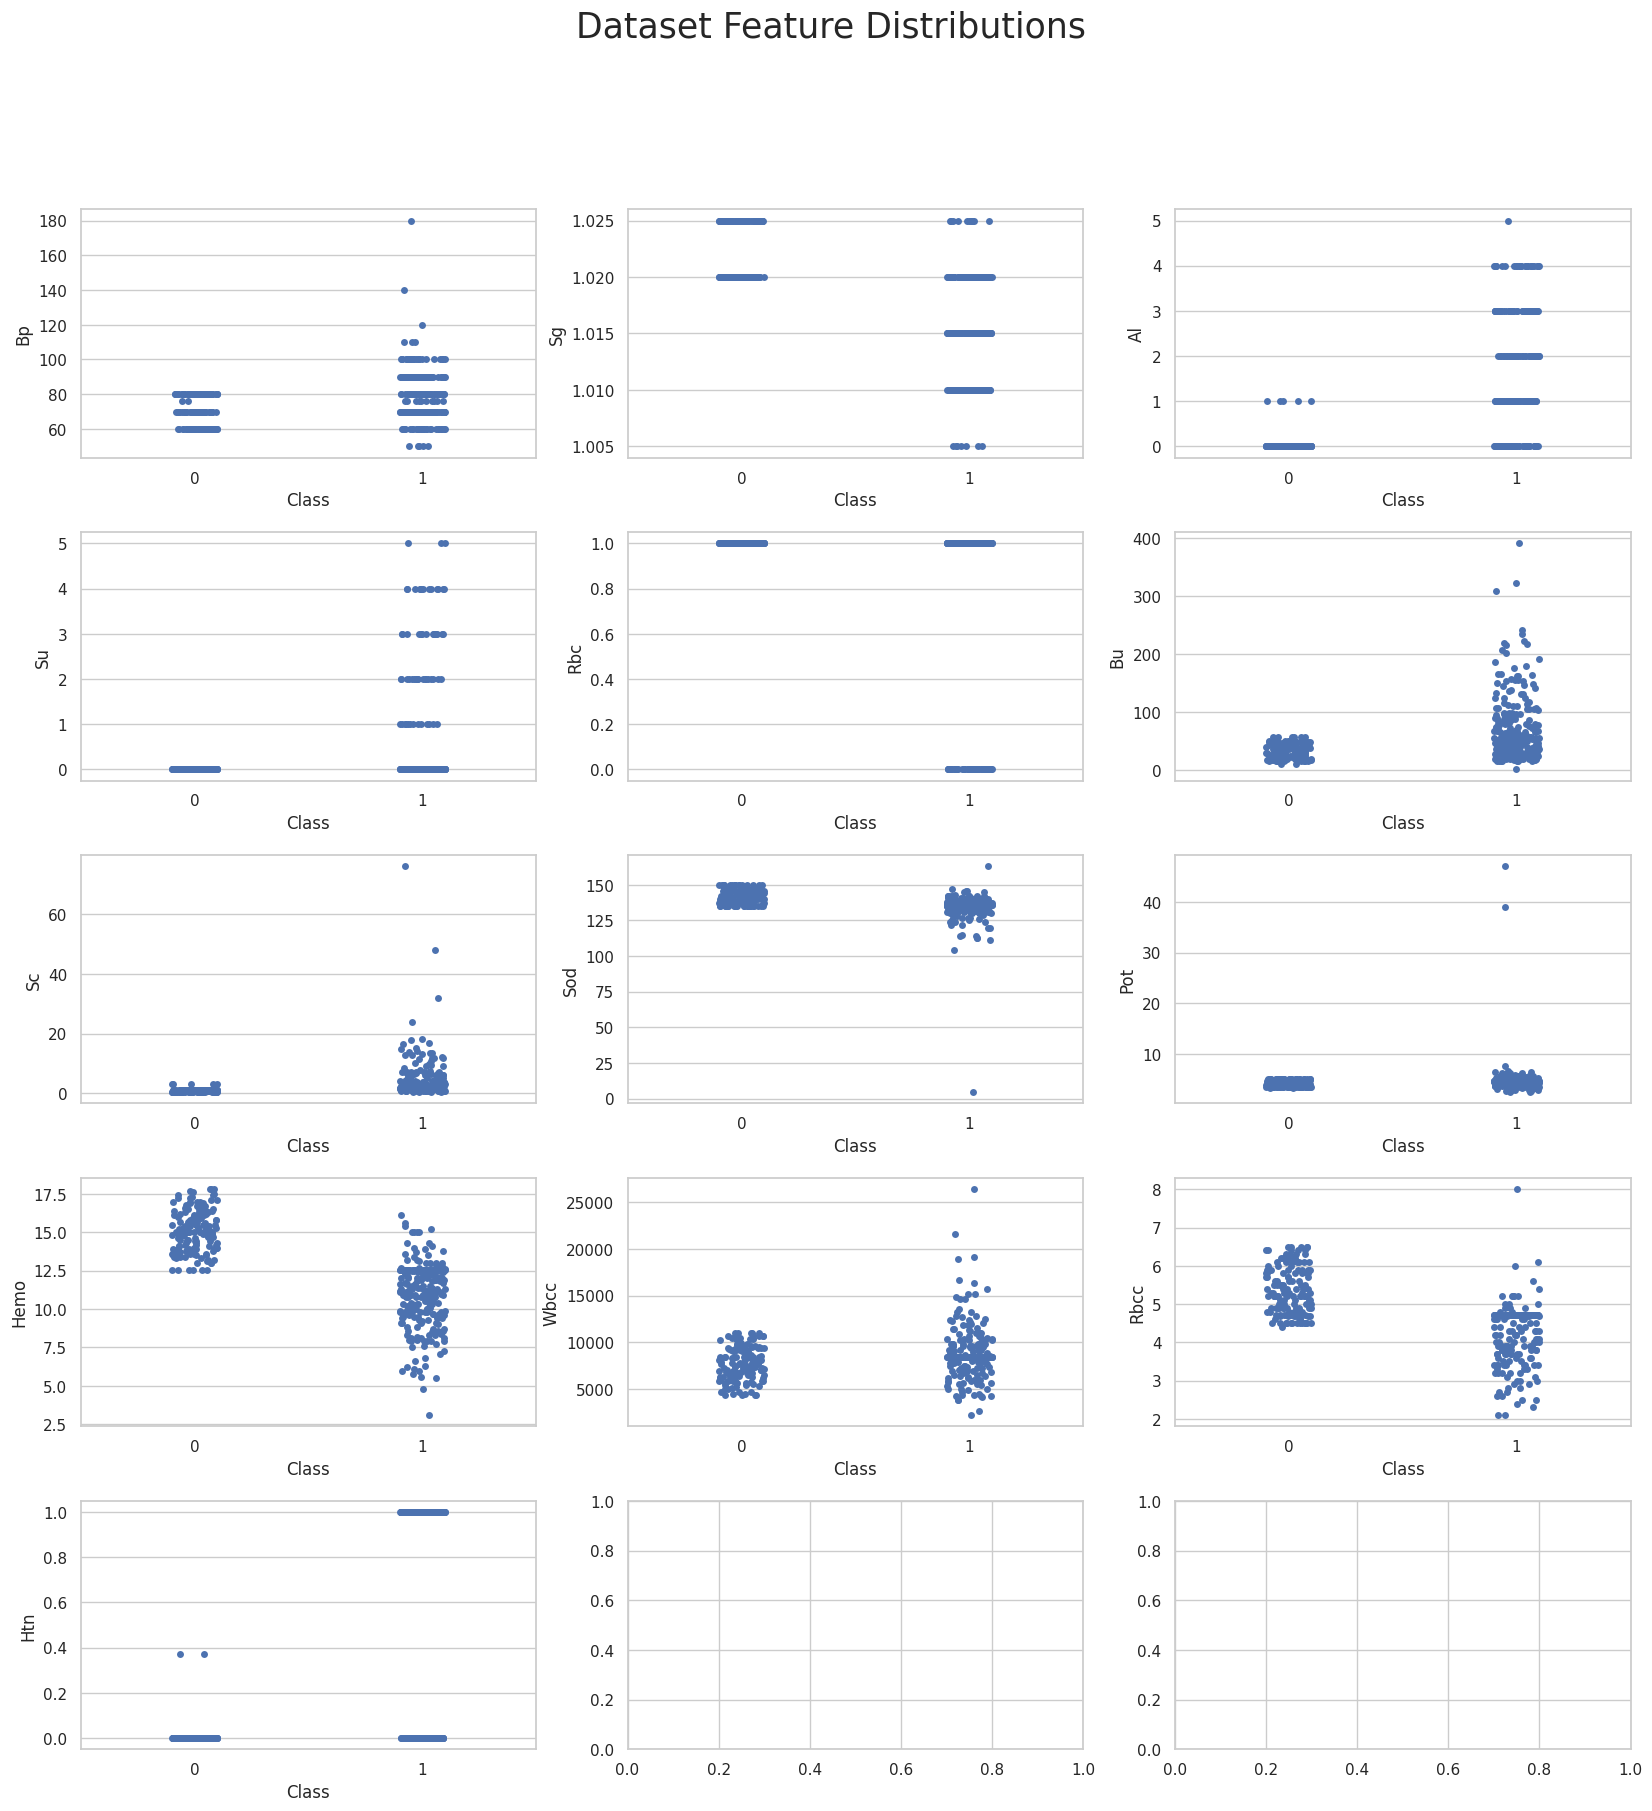

In [15]:
fig2, axes = plt.subplots(5,3,figsize=(20,20))
fig2.suptitle('Dataset Feature Distributions',fontsize=25)
i=0;j=0;k=0;l=0;n=0
for column,value in df.iteritems():
    if(column == 'Bp' or column == 'Sg' or column == 'Al'):
        sns.stripplot(x="Class", y=column, data=df, ax=axes[0,i])
        i=i+1
    elif(column == 'Su' or column == 'Rbc' or column == 'Bu'):
        sns.stripplot(x="Class", y=column, data=df, ax=axes[1,j])
        j=j+1
    elif(column == 'Sc' or column == 'Sod' or column == 'Pot'):
        sns.stripplot(x="Class", y=column, data=df, ax=axes[2,k])
        k=k+1
    elif(column == 'Hemo' or column == 'Wbcc' or column == 'Rbcc'):
        sns.stripplot(x="Class", y=column, data=df, ax=axes[3,l])
        l=l+1
    elif(column == 'Htn'):
        sns.stripplot(x="Class", y=column, data=df, ax=axes[4,n])
        n=n+1

plt.subplots_adjust(wspace= 0.2,hspace=0.3)
plt.show()

Breakdown of the code:

numerical_columns = ['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']

This line defines a list of column names that are considered numerical and for which histograms will be plotted.
sns.set(style='whitegrid')

Sets the aesthetic style of the plots to have a white background with gridlines using the seaborn library.
plt.figure(figsize=(10,6))

Initializes a new figure for plotting with a width of 10 inches and a height of 6 inches.
for i, var in enumerate(numerical_columns, 1):

This starts a loop over the numerical_columns list, with enumerate providing both the index i (starting from 1) and the column name var.
plt.subplot(3, 3, i)

Within the loop, this line creates a subplot on a 3x3 grid (9 subplots in total) for each histogram. The index i determines the position of the subplot on the grid.
sns.histplot(data=df, x=var, kde=True, bins=20, color='Teal')

Uses seaborn's histplot to create a histogram for the column var. kde=True adds a kernel density estimate line to show the distribution shape, bins=20 specifies that the data range should be divided into 20 bins, and color='Teal' sets the color of the histogram bars to teal.
plt.xticks(fontsize=6)

Sets the font size of the x-axis tick labels to 6, making them smaller for readability.
plt.yticks(fontsize=6)

Sets the font size of the y-axis tick labels to 6, consistent with the x-axis for uniformity.
plt.xlabel(var, fontsize=8)

Labels the x-axis with the name of the variable being plotted and sets the font size to 8.
plt.ylabel('')

Sets the y-axis label to an empty string, effectively removing it.
plt.tight_layout()

Adjusts the subplots to fit into the figure area without overlapping.
plt.show()

Displays the figure with all the subplots.

**Handling outliers**

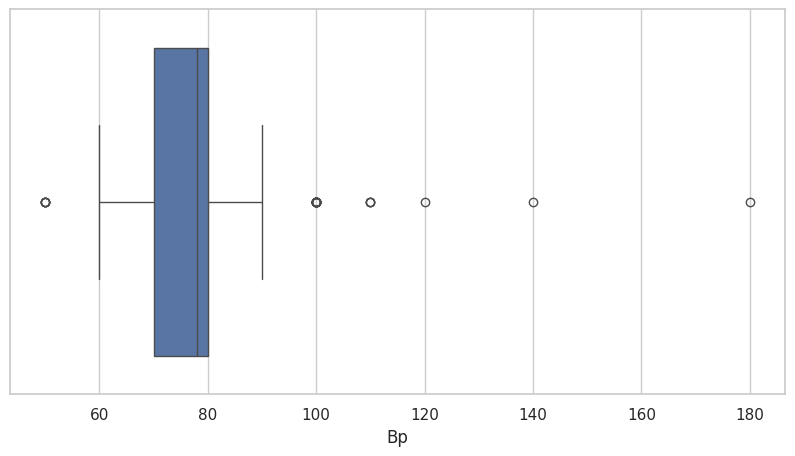

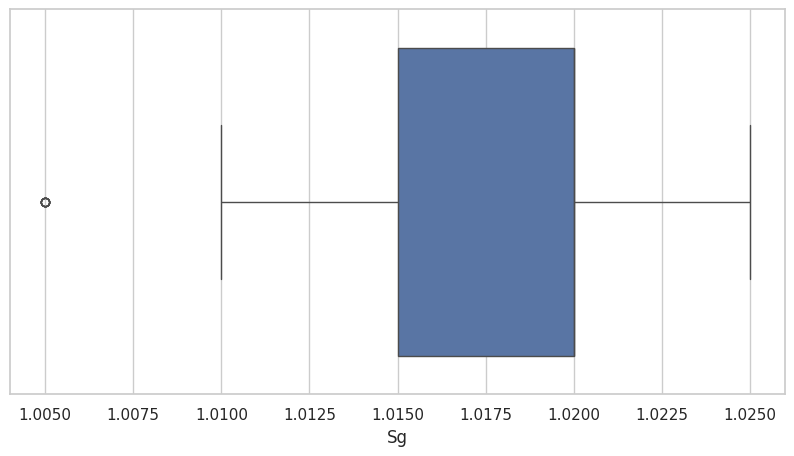

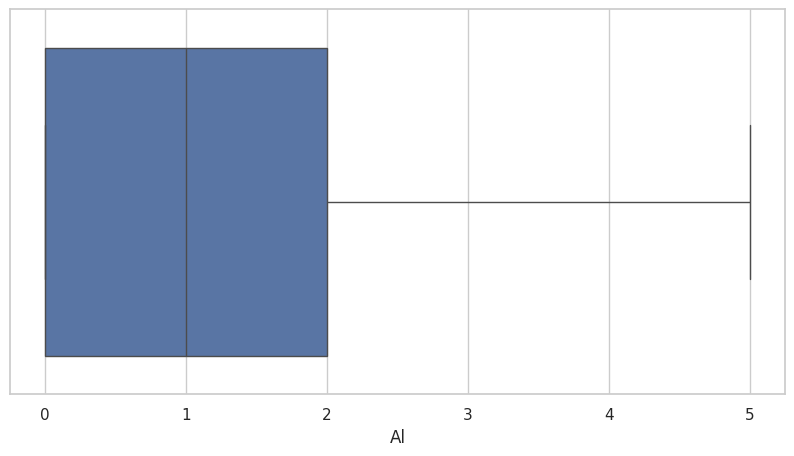

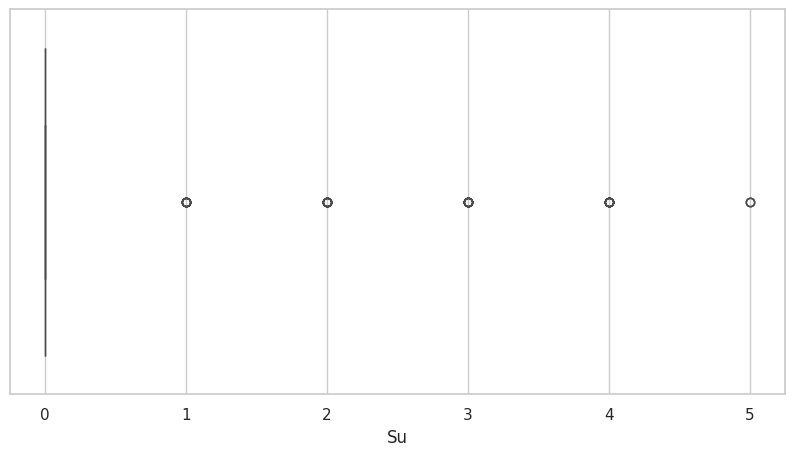

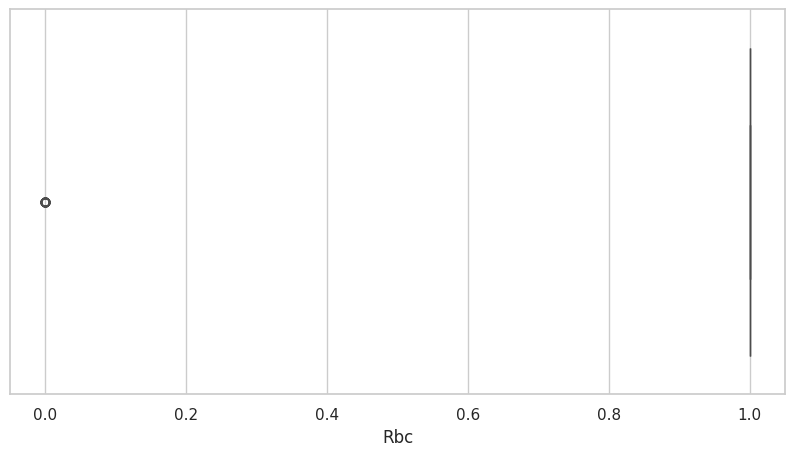

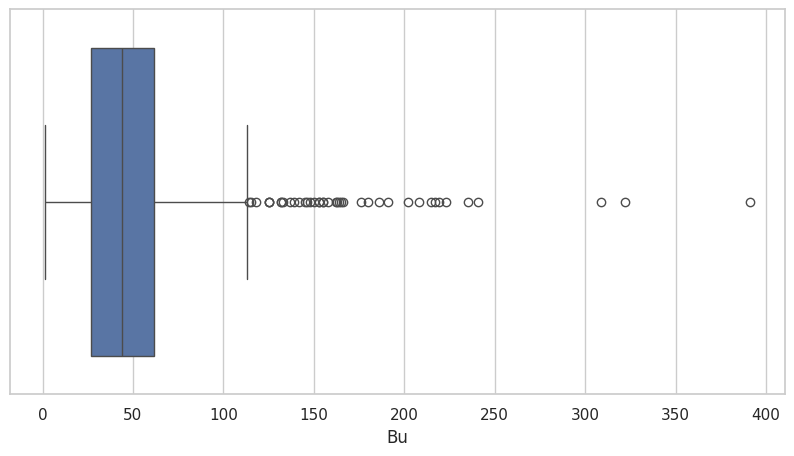

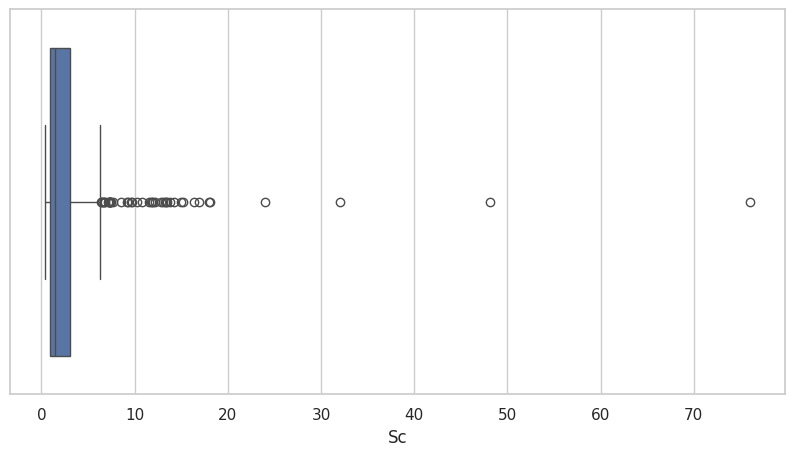

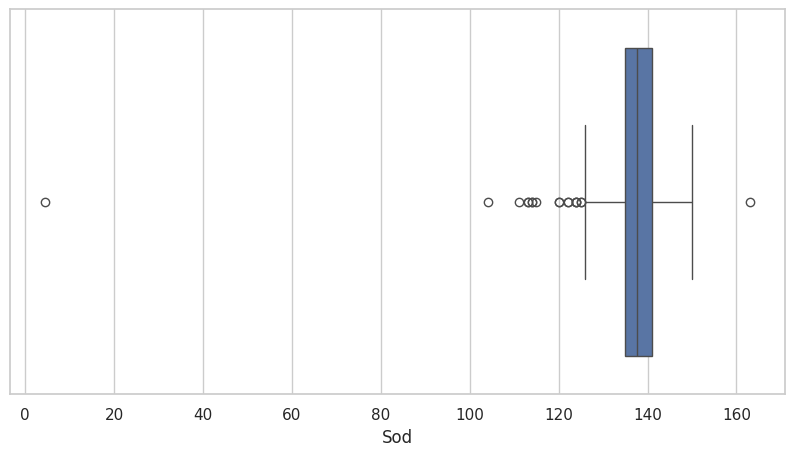

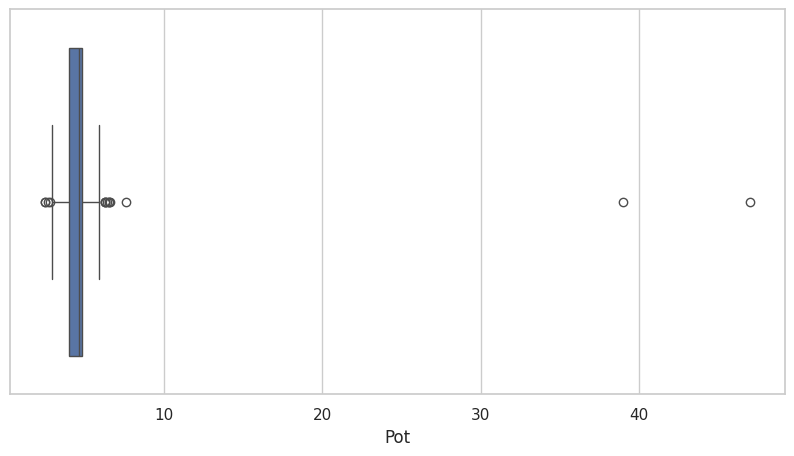

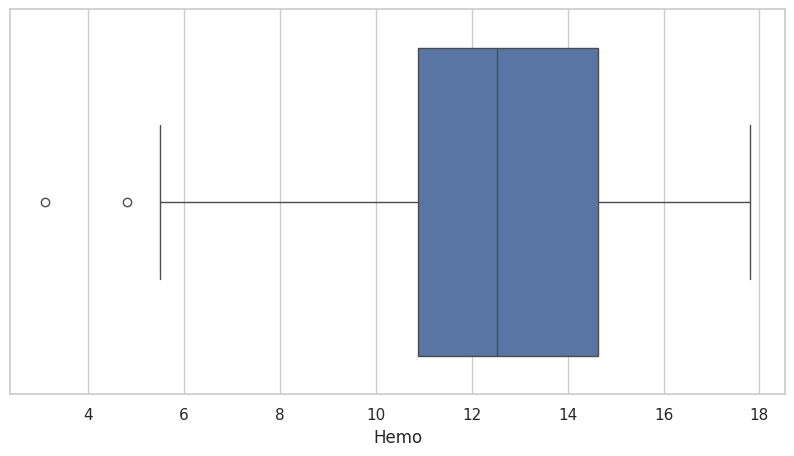

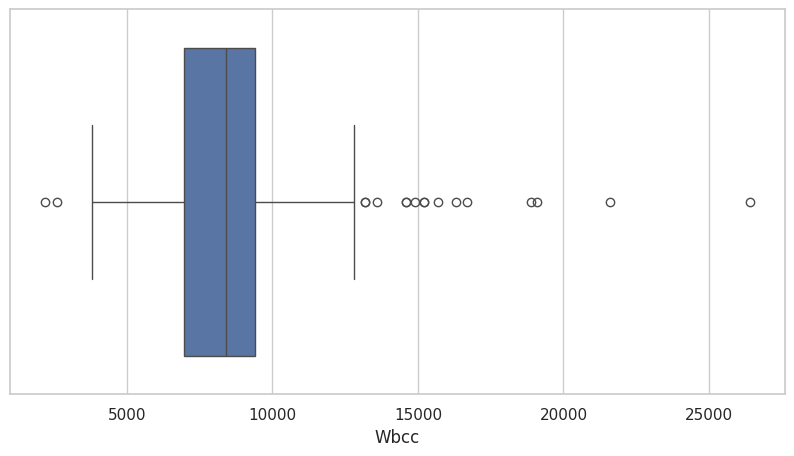

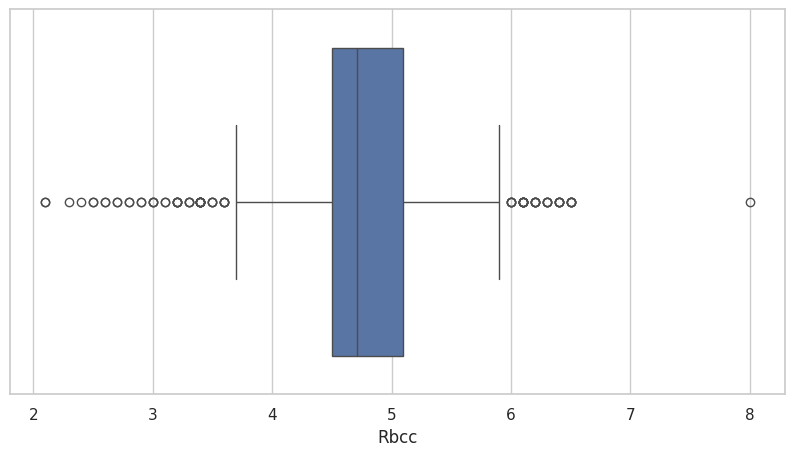

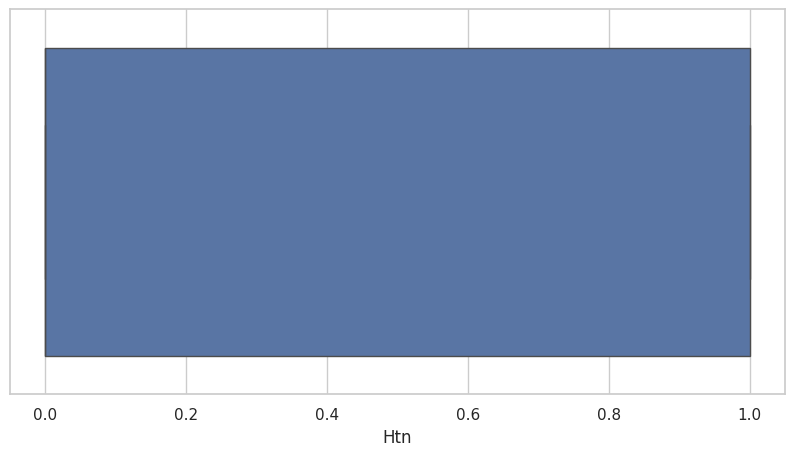

In [16]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [17]:
for column in df.columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-(1.5*iqr)
    upper_limit=q3+(1.5*iqr)
    df[column]=np.where(df[column]<lower_limit,lower_limit,df[column])
    df[column]=np.where(df[column]>upper_limit,upper_limit,df[column])

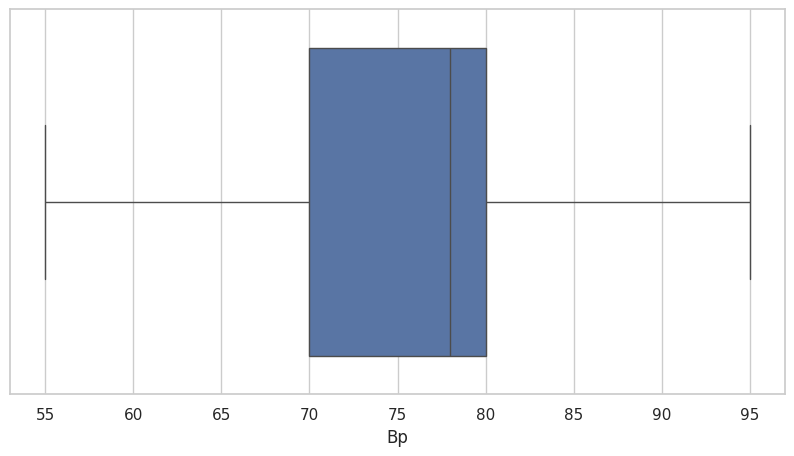

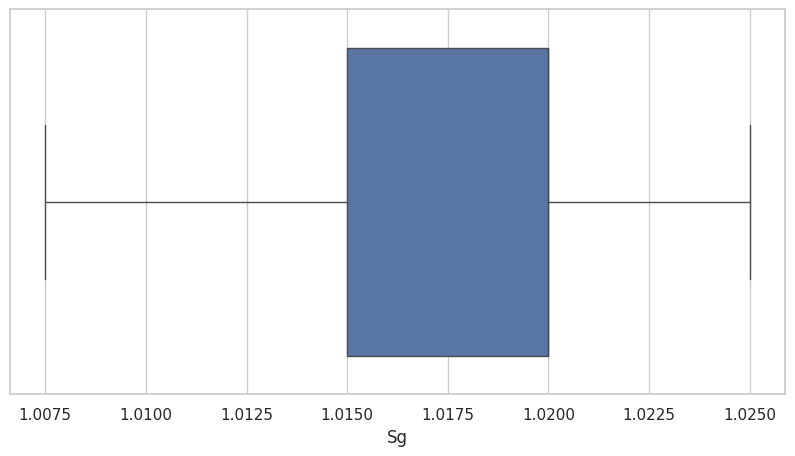

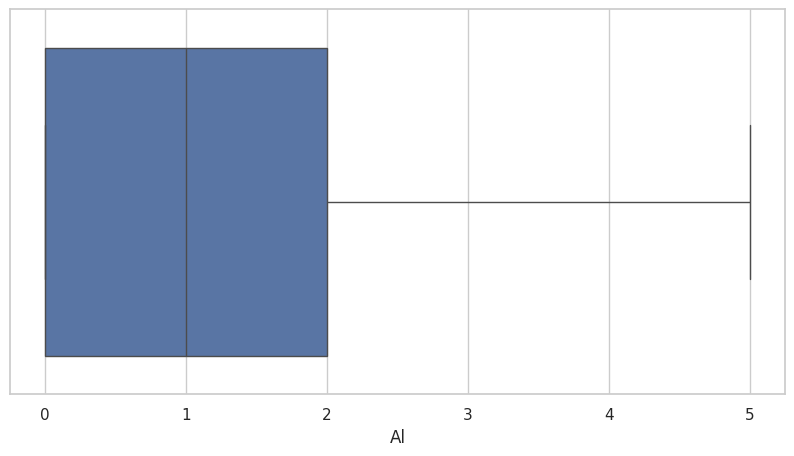

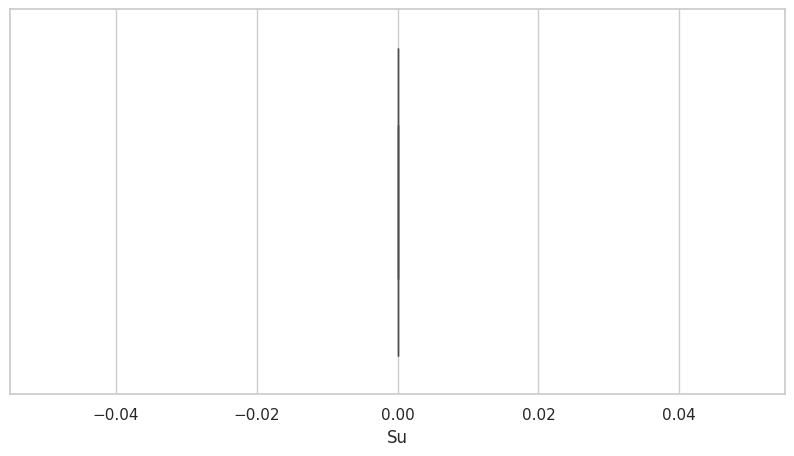

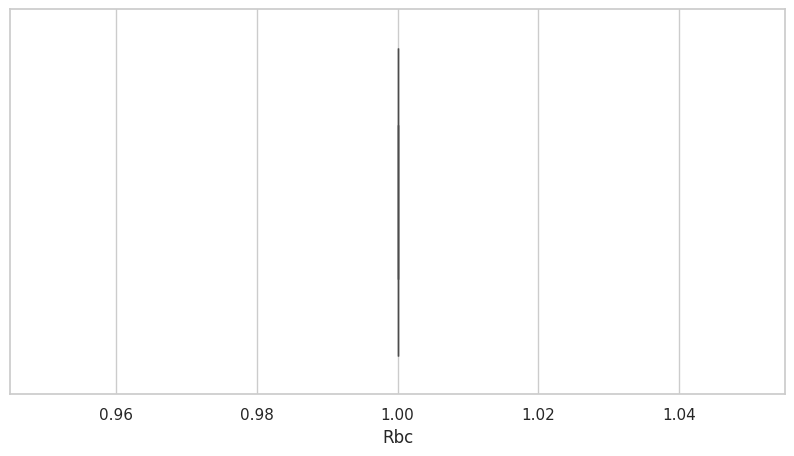

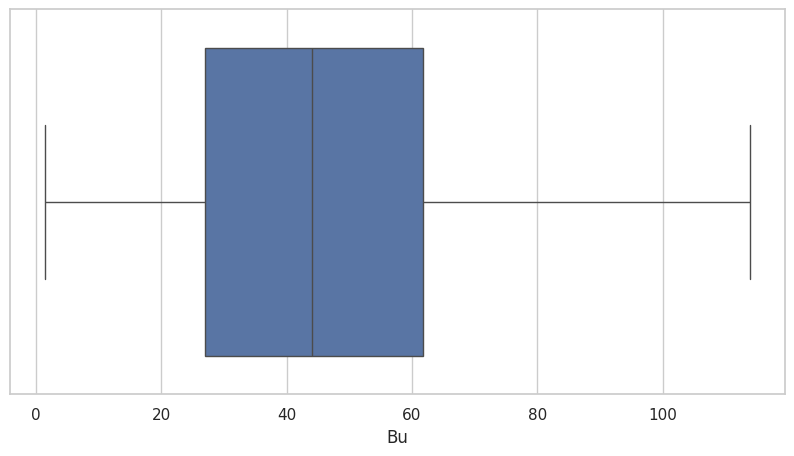

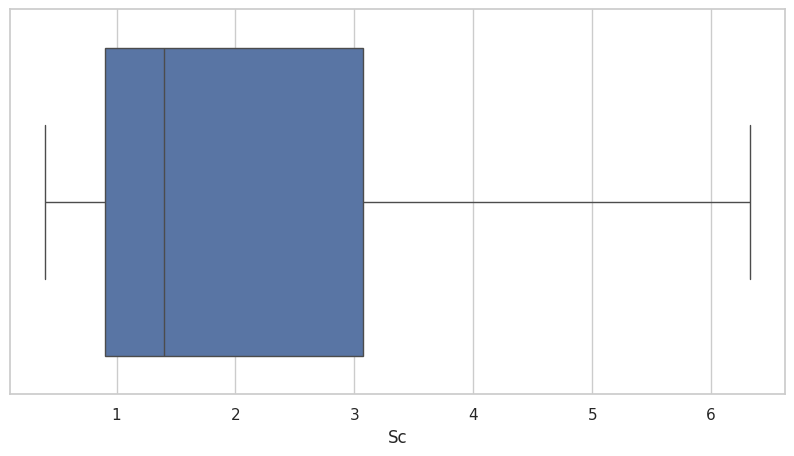

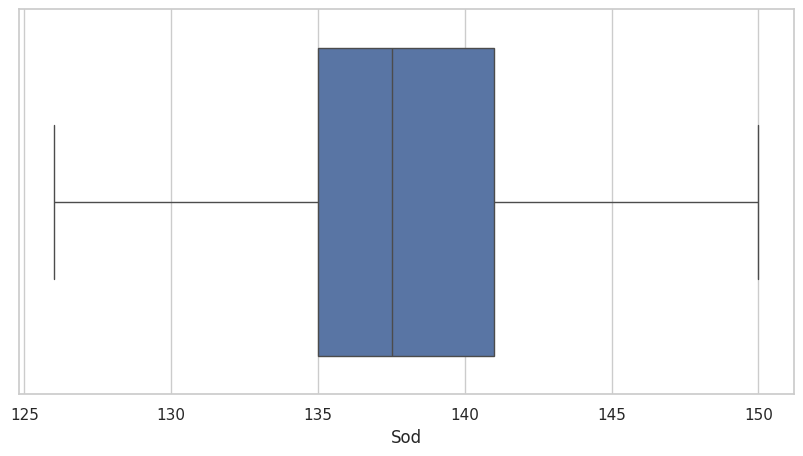

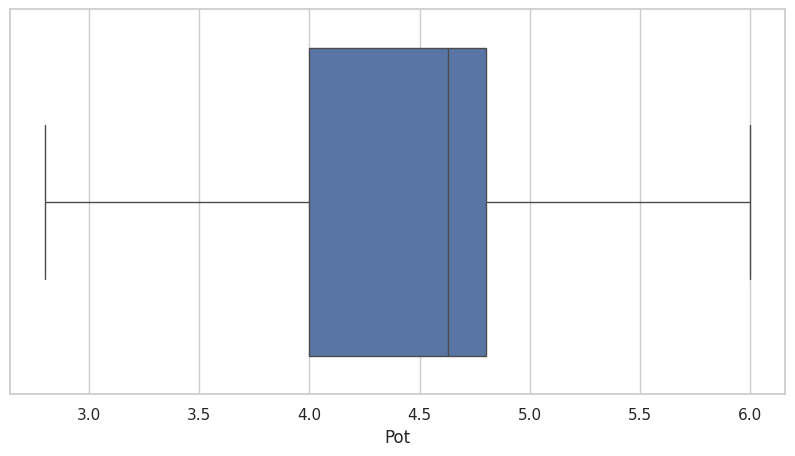

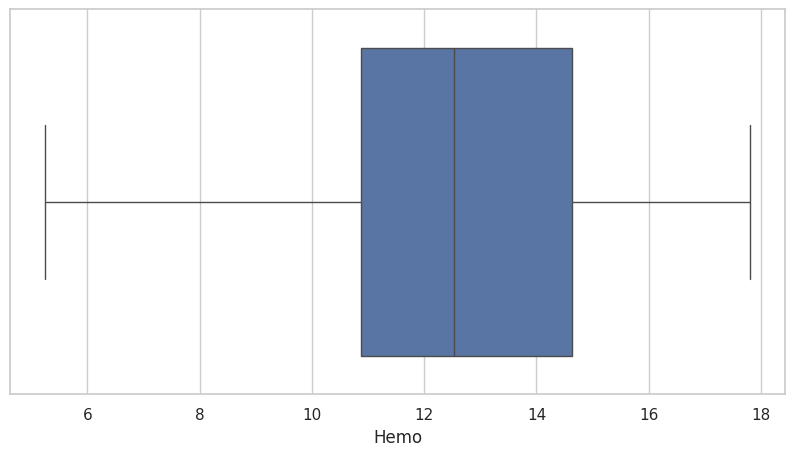

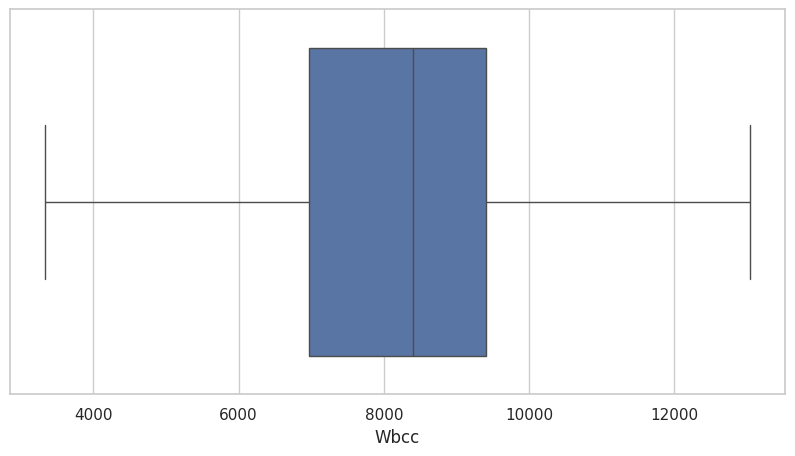

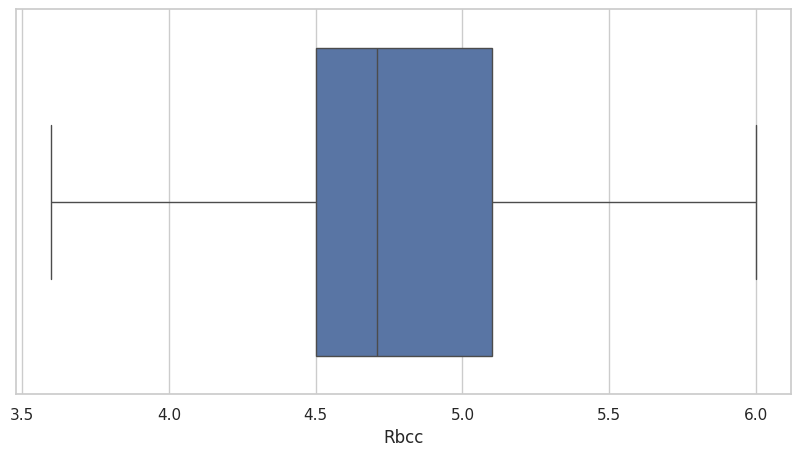

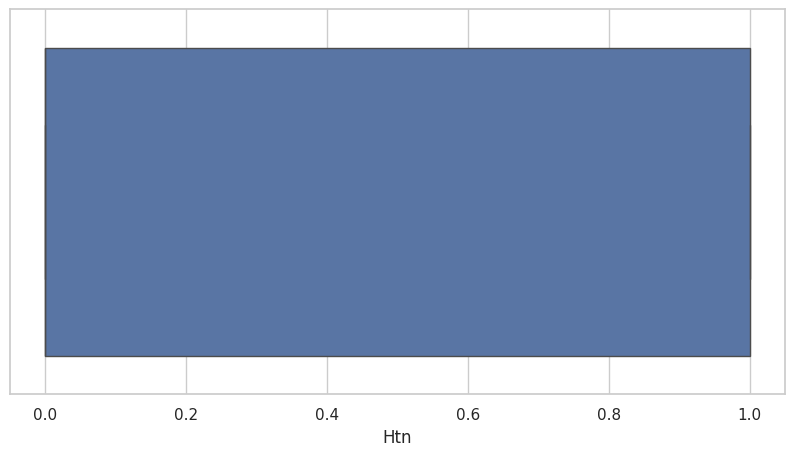

In [18]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

**correlation matrix**

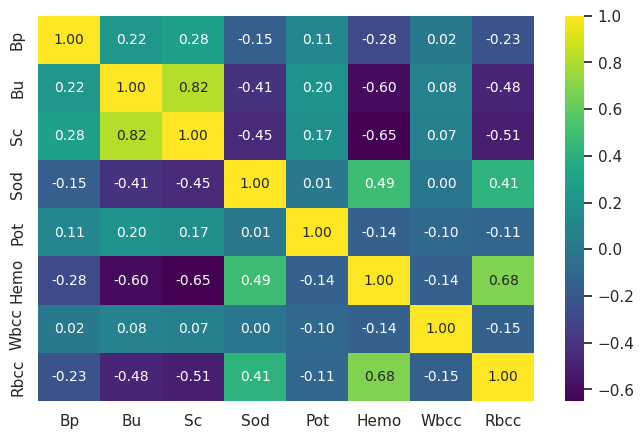

In [19]:
corr_df = df[['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']]
corr_matrix = corr_df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':10}, fmt='.2f', cmap='viridis')
plt.show()

Breakdown of the code:

corr_df = df[['Bp', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']]

This line creates a new DataFrame, corr_df, containing only the selected columns from the original DataFrame df. These columns appear to be related to various blood and urine test results, likely relevant in assessing kidney function.
corr_matrix = corr_df.corr()

Here, the .corr() method is used to compute the pairwise correlation of columns, excluding NA/null values. The method returns a correlation matrix, which contains correlation coefficients that measure the linear relationships between the variables.
plt.figure(figsize=(8, 5))

Initializes a new figure for plotting with a width of 8 inches and a height of 5 inches.
sns.heatmap(corr_matrix, annot=True, annot_kws={'size':10}, fmt='.2f', cmap='viridis')

This line creates a heatmap using seaborn's heatmap function. The first argument is the correlation matrix calculated earlier. annot=True tells seaborn to annotate each cell with the numeric value using the annot_kws={'size':10} to set the font size of the annotations. fmt='.2f' specifies the string formatting code to display only two decimal places. The cmap='viridis' sets the color map of the heatmap to 'viridis', which is a color palette ranging from yellow to dark blue.
plt.show()

Finally, this function displays the heatmap.

**# Plotting the heatmap to check the correlation between the Target Label and other features**

Text(0.5, 1.0, 'Correlation of Target feature with all features')

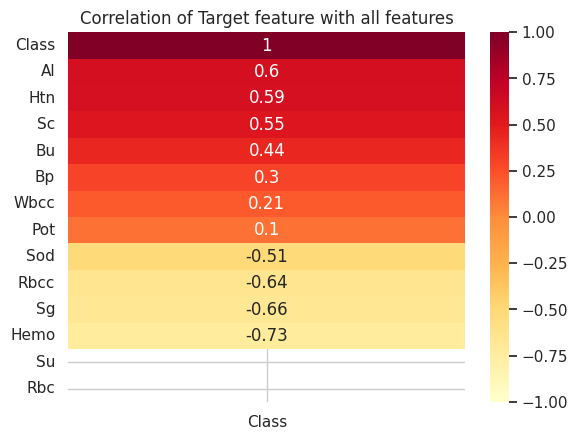

In [20]:
sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlOrRd')
plt.title('Correlation of Target feature with all features')

Breakdown of the code:


sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlOrRd')

df.corr() computes the pairwise correlation of all columns in the DataFrame df.
[['Class']] creates a DataFrame with just the 'Class' column of the correlation matrix, which includes the correlation coefficients between 'Class' and all other features.
.sort_values(by='Class', ascending=False) sorts the correlation coefficients in descending order, so the features most positively correlated with 'Class' appear at the top.
sns.heatmap() is called to create the heatmap. The parameters within the function define the following:
vmin=-1, vmax=1: These set the range of the color scale for the heatmap. Since correlation coefficients range from -1 to 1, this ensures the color scale represents the full range of possible values.
annot=True: This enables annotations within the heatmap cells, displaying the correlation coefficient values.
cmap='YlOrRd': This sets the colormap to 'Yellow-Orange-Red', where yellow represents lower correlation values, orange represents moderate correlations, and red represents higher correlation values.
plt.title('Correlation of Target feature with all features')

This adds a title to the heatmap, which helps viewers understand the purpose of the visualization.

In [21]:
pip install xgboost

In [22]:

pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


**Regularization**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Model: Logistic Regression
Accuracy: 0.97
Confusion Matrix:
[[42  2]
 [ 2 74]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        44
         1.0       0.97      0.97      0.97        76

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120

AUC Score: 0.96
Cohen Kappa Score: 0.93
-----------------------------------------------------
Model: SVM
Accuracy: 0.63
Confusion Matrix:
[[ 0 44]
 [ 0 76]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        44
         1.0       0.63      1.00      0.78        76

    accuracy                           0.63       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.40      0.63      0.49       120

AUC Score: 0.50
Cohen Kappa Score: 0.00
------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: XGBoost
Accuracy: 0.99
-----------------------------------------------------
Learning rate set to 0.005982
0:	learn: 0.6831182	total: 1.21ms	remaining: 1.21s
1:	learn: 0.6717082	total: 2.64ms	remaining: 1.32s
2:	learn: 0.6603828	total: 3.71ms	remaining: 1.23s
3:	learn: 0.6506351	total: 4.91ms	remaining: 1.22s
4:	learn: 0.6414074	total: 6.2ms	remaining: 1.23s
5:	learn: 0.6295546	total: 7.07ms	remaining: 1.17s
6:	learn: 0.6211023	total: 8.35ms	remaining: 1.18s
7:	learn: 0.6126807	total: 9.35ms	remaining: 1.16s
8:	learn: 0.6051134	total: 10.6ms	remaining: 1.17s
9:	learn: 0.5959553	total: 13.1ms	remaining: 1.3s
10:	learn: 0.5867768	total: 14.2ms	remaining: 1.28s
11:	learn: 0.5767454	total: 15.4ms	remaining: 1.27s
12:	learn: 0.5690183	total: 16.7ms	remaining: 1.27s
13:	learn: 0.5620224	total: 22.5ms	remaining: 1.58s
14:	learn: 0.5538914	total: 24.2ms	remaining: 1.59s
15:	learn: 0.5474037	total: 26.3ms	remaining: 1.61s
16:	learn: 0.5393700	total: 27.9ms	remaining: 1.61s
17:	learn: 0.5

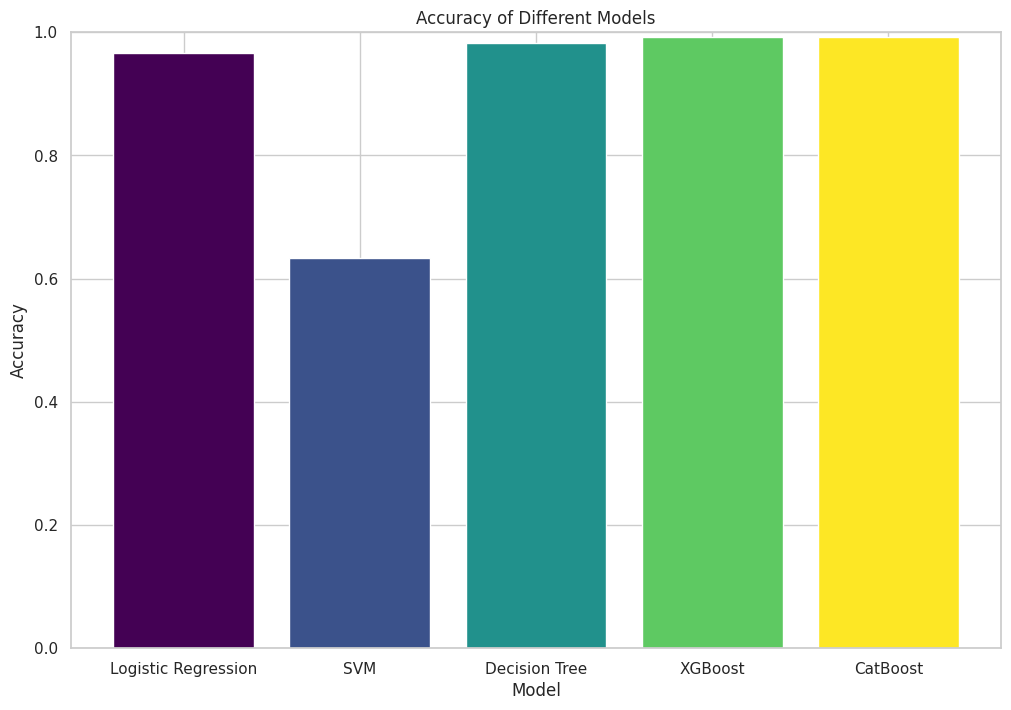

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    cohen_kappa_score,
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='rbf', C=1),  # Regularize the SVM
    #'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),  # Adjust hyperparameters
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),  # Adjust max depth
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    kappa = cohen_kappa_score(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {acc:.2f}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Classification Report:\n{cr}')
    print(f'AUC Score: {auc_score:.2f}')
    print(f'Cohen Kappa Score: {kappa:.2f}')
    print('-----------------------------------------------------')

# Plotting
import matplotlib.pyplot as plt
import numpy as np

model_names = []
accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    model_names.append(name)
    accuracies.append(acc)

    print(f'Model: {name}')
    print(f'Accuracy: {acc:.2f}')
    print('-----------------------------------------------------')

# Plot the diagram
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(model_names)))
ax.bar(model_names, accuracies, color=colors)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Models')
ax.set_ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()


# **Precision. Recall, F1 score after 5 cross validation**

Model: SVM
Cross-validated Precision: 0.69
Cross-validated Recall: 0.91
Cross-validated F1 Score: 0.78
-----------------------------------------------------
Model: Decision Tree
Cross-validated Precision: 0.98
Cross-validated Recall: 0.95
Cross-validated F1 Score: 0.96
-----------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Streaming output truncated to the last 5000 lines.
9:	learn: 0.6129894	total: 12.1ms	remaining: 1.2s
10:	learn: 0.6055713	total: 13.3ms	remaining: 1.19s
11:	learn: 0.5992834	total: 14.4ms	remaining: 1.19s
12:	learn: 0.5910619	total: 15.6ms	remaining: 1.18s
13:	learn: 0.5843708	total: 16.7ms	remaining: 1.18s
14:	learn: 0.5780723	total: 17.8ms	remaining: 1.17s
15:	learn: 0.5720604	total: 19ms	remaining: 1.17s
16:	learn: 0.5651833	total: 20.1ms	remaining: 1.16s
17:	learn: 0.5594140	total: 21.2ms	remaining: 1.16s
18:	learn: 0.5545282	total: 22.4ms	remaining: 1.16s
19:	learn: 0.5480631	total: 23.5ms	remaining: 1.15s
20:	learn: 0.5402507	total: 24.6ms	remaining: 1.15s
21:	learn: 0.5342336	total: 25.8ms	remaining: 1.15s
22:	learn: 0.5281874	total: 26.9ms	remaining: 1.14s
23:	learn: 0.5225654	total: 28ms	remaining: 1.14s
24:	learn: 0.5168618	total: 29.1ms	remaining: 1.14s
25:	learn: 0.5100698	total: 30.2ms	remaining: 1.13s
26:	learn: 0.5033876	total: 31.4ms	remaining: 1.13s
27:	learn: 0.496836

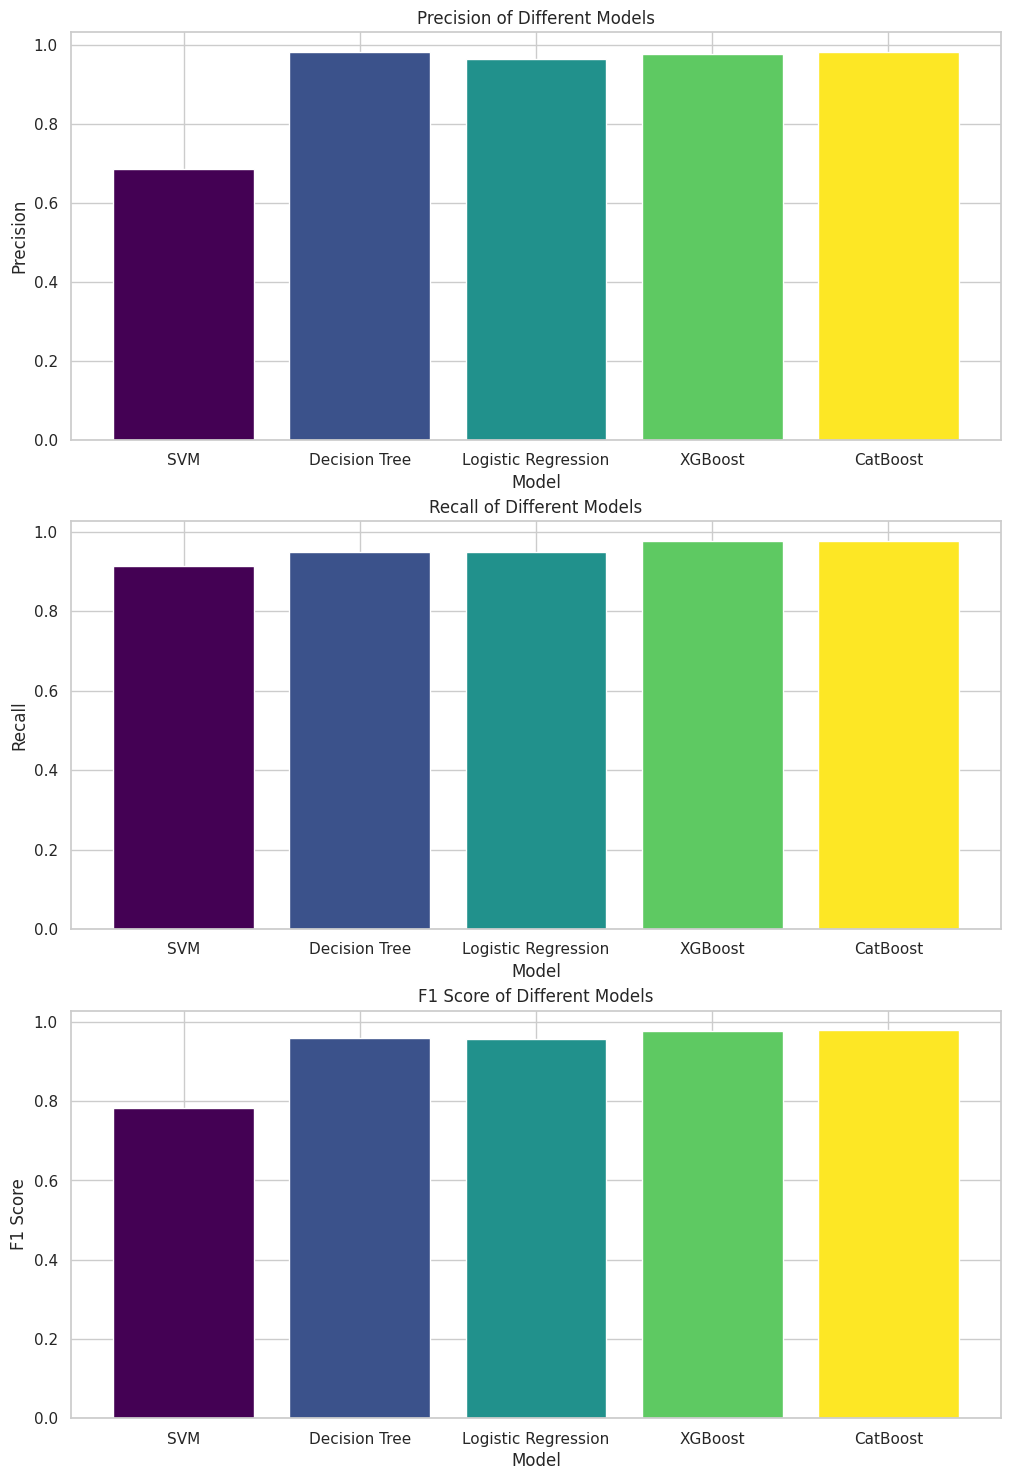

In [28]:
from sklearn.model_selection import cross_val_score

# Lists to store evaluation metrics for each model
precision_scores = []
recall_scores = []
f1_scores = []

# Define a new dictionary to hold models without overfitting
non_overfitting_models = {}

# Cross-validate each model
for name, model in models.items():
    # Perform 5-fold cross-validation
    cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    # Take the mean score to represent model performance
    precision = np.mean(cv_precision)
    recall = np.mean(cv_recall)
    f1 = np.mean(cv_f1)

    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print results
    print(f'Model: {name}')
    print(f'Cross-validated Precision: {precision:.2f}')
    print(f'Cross-validated Recall: {recall:.2f}')
    print(f'Cross-validated F1 Score: {f1:.2f}')
    print('-----------------------------------------------------')

    # Store models with non-overfitting results
    if precision < 1.0 or recall < 1.0 or f1 < 1.0:
        non_overfitting_models[name] = model

# Plotting precision, recall, and F1 score for non-overfitting models
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 1, len(non_overfitting_models)))

# Plot Precision
axes[0].bar(non_overfitting_models.keys(), precision_scores, color=colors)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision of Different Models')

# Plot Recall
axes[1].bar(non_overfitting_models.keys(), recall_scores, color=colors)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Recall')
axes[1].set_title('Recall of Different Models')

# Plot F1 Score
axes[2].bar(non_overfitting_models.keys(), f1_scores, color=colors)
axes[2].set_xlabel('Model')
axes[2].set_ylabel('F1 Score')
axes[2].set_title('F1 Score of Different Models')

plt.show()


In [30]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.4 MB/s eta 0:00:00


# **Apply SHAP in Decision Tree**

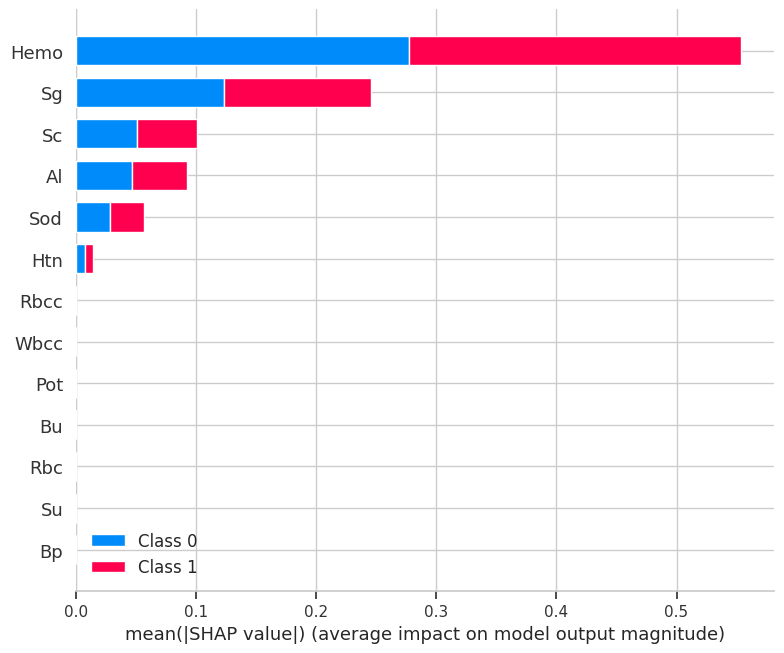

In [31]:
import shap

# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(decision_tree_model)
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [33]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e8b402deb8229c587b327bab89a73f70ed0a0078e6905ac5c11a1e8b1df0e902
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **Apply LIME in XGBoost model**

In [34]:
import lime
import lime.lime_tabular
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

#  LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
                                                   feature_names=X_train.columns,
                                                   class_names=["No Disease", "Disease"],
                                                   mode="classification")

# Choose an instance for explanation
instance_idx = 0
instance = X_test.iloc[[instance_idx]]

explanation = explainer.explain_instance(instance.values[0], xgb_model.predict_proba, num_features=len(X_train.columns))

explanation.show_in_notebook(show_table=True)


# **Deep Learning Model - ANN**

In [35]:
pip install tensorflow


Epoch 1/15
9/9 [==============================] - 3s 58ms/step - loss: 0.6442 - accuracy: 0.6679 - val_loss: 0.5591 - val_accuracy: 0.8917
Epoch 2/15
9/9 [==============================] - 0s 11ms/step - loss: 0.4965 - accuracy: 0.9321 - val_loss: 0.4322 - val_accuracy: 0.9583
Epoch 3/15
9/9 [==============================] - 0s 15ms/step - loss: 0.3911 - accuracy: 0.9393 - val_loss: 0.3377 - val_accuracy: 0.9667
Epoch 4/15
9/9 [==============================] - 0s 15ms/step - loss: 0.3114 - accuracy: 0.9464 - val_loss: 0.2651 - val_accuracy: 0.9750
Epoch 5/15
9/9 [==============================] - 0s 14ms/step - loss: 0.2502 - accuracy: 0.9429 - val_loss: 0.2115 - val_accuracy: 0.9833
Epoch 6/15
9/9 [==============================] - 0s 15ms/step - loss: 0.2058 - accuracy: 0.9464 - val_loss: 0.1720 - val_accuracy: 0.9833
Epoch 7/15
9/9 [==============================] - 0s 12ms/step - loss: 0.1733 - accuracy: 0.9500 - val_loss: 0.1433 - val_accuracy: 0.9833
Epoch 8/15
9/9 [===========

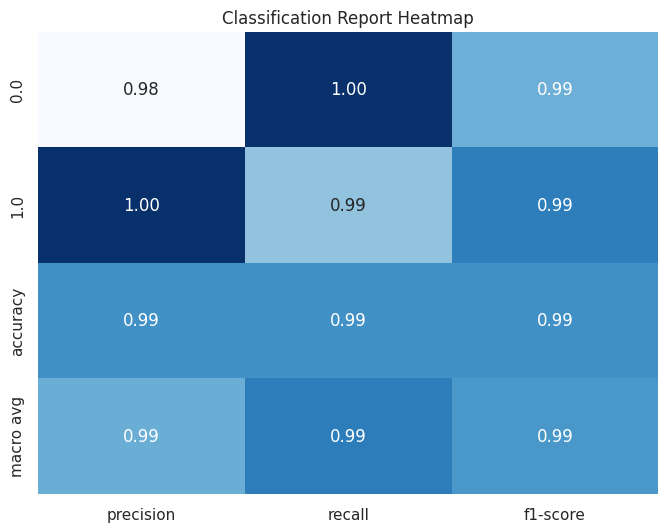

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
# Split data into train and test sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
ann_model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate metrics
acc_ann = accuracy_score(y_test, y_pred_ann)
cm_ann = confusion_matrix(y_test, y_pred_ann)
cr_ann = classification_report(y_test, y_pred_ann)

# Print results
print('ANN Model Results:')
print(f'Accuracy: {acc_ann:.2f}')
print(f'Confusion Matrix:\n{cm_ann}')
print(f'Classification Report:\n{cr_ann}')


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assume cr_ann is your classification report
cr_ann_dict = classification_report(y_test, y_pred_ann, output_dict=True)

# Convert the classification report to a DataFrame for easy plotting
cr_df = pd.DataFrame(cr_ann_dict).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cr_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title('Classification Report Heatmap')
plt.show()


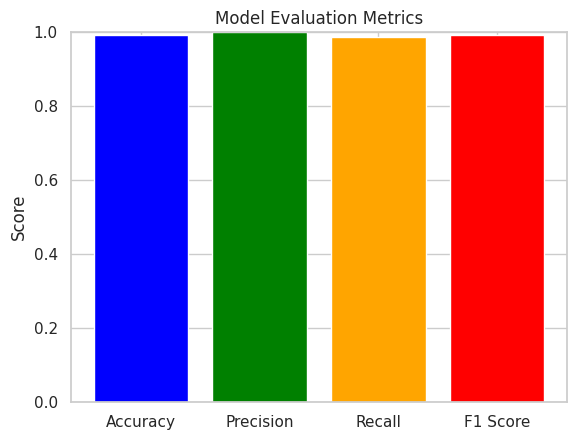

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you have computed accuracy, precision, recall, and f1 scores
accuracy = acc_ann
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Create lists for labels and scores
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Plot the bar chart
plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()


# **Hybrid Deep Learning Model (CNN+LSTM)**

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN (assuming X_train_scaled and X_test_scaled are 2D arrays)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the hybrid model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f'Hybrid Model Accuracy: {accuracy:.2f}')


Epoch 1/10
9/9 [==============================] - 2s 53ms/step - loss: 0.6787 - accuracy: 0.6036 - val_loss: 0.6608 - val_accuracy: 0.6333
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 0.6580 - accuracy: 0.6214 - val_loss: 0.6371 - val_accuracy: 0.6333
Epoch 3/10
9/9 [==============================] - 0s 10ms/step - loss: 0.6385 - accuracy: 0.6214 - val_loss: 0.6120 - val_accuracy: 0.6333
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 0.6138 - accuracy: 0.6214 - val_loss: 0.5711 - val_accuracy: 0.6333
Epoch 5/10
9/9 [==============================] - 0s 11ms/step - loss: 0.5693 - accuracy: 0.6571 - val_loss: 0.4986 - val_accuracy: 0.7917
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 0.4839 - accuracy: 0.8143 - val_loss: 0.3774 - val_accuracy: 0.9083
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 0.3588 - accuracy: 0.8679 - val_loss: 0.2397 - val_accuracy: 0.9167
Epoch 8/10
9/9 [============

4/4 [==============================] - 0s 6ms/step - loss: 0.0693 - accuracy: 0.9750


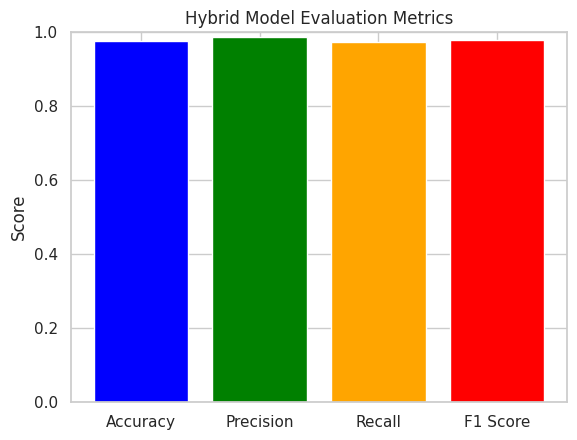

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_hybrid = (model.predict(X_test_cnn) > 0.5).astype("int32")
accuracy_hybrid = model.evaluate(X_test_cnn, y_test)[1]
precision_hybrid = precision_score(y_test, y_pred_hybrid)
recall_hybrid = recall_score(y_test, y_pred_hybrid)
f1_hybrid = f1_score(y_test, y_pred_hybrid)

# Create lists for labels and scores
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_hybrid, precision_hybrid, recall_hybrid, f1_hybrid]

# Plot
plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.title('Hybrid Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()




---



# End of the Project